<a href="https://colab.research.google.com/github/artem-dorofeev/py_DataScience_HW/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Частина перша: Знайомство з Pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


*Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"*

In [24]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
name_search = "Коефіцієнт народжуваності в регіонах України"
tables = pd.read_html(url, match=name_search)
obj_table = tables[0]
# print(table)

*Вивести перші рядки таблиці за допомогою методу head*

In [25]:
obj_table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


*Визначте кількість рядків та стовпців у датафреймі (атрибут shape)*

In [26]:
rows, columns = obj_table.shape

print(f"Кількість рядків: {rows}")
print(f"Кількість стовпців: {columns}")

Кількість рядків: 28
Кількість стовпців: 9


*Замініть у таблиці значення "—" на значення NaN*

In [27]:

obj_table.replace('—', np.nan, inplace=True)
obj_table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN


*Визначте типи всіх стовпців за допомогою dataframe.dtypes*

In [28]:
obj_table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

*Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"*

In [32]:
modified_table = obj_table.copy()

for column in modified_table.columns:
    if column != "Регіон":
        modified_table[column] = pd.to_numeric(modified_table[column], errors='coerce')

# print(modified_table)
modified_table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

*Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)*

In [34]:
missing_values_modified = modified_table.isnull().sum()

total_values_modified = len(modified_table)
missing_percentage_modified = (missing_values_modified / total_values_modified) * 100

missing_data_modified_df = pd.DataFrame({
    'Кількість пропусків': missing_values_modified,
    'Частка пропусків (%)': missing_percentage_modified
})

missing_data_modified_df

,Кількість пропусків,Частка пропусків (%)
Регіон,0,0.000000
1950,2,7.142857
1960,1,3.571429
1970,1,3.571429
1990,0,0.000000
2000,0,0.000000
2012,0,0.000000
2014,2,7.142857
2019,4,14.285714


*Видаліть з таблиці дані по всій країні, останній рядок таблиці*

In [37]:
modified_table = modified_table.drop(modified_table.index[-1])

modified_table.tail()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
20,Херсонська,208.0,214.0,166.0,143,85,117,115.0,81.0
21,Хмельницька,234.0,198.0,148.0,129,85,113,112.0,79.0
22,Черкаська,205.0,179.0,144.0,123,75,100,98.0,64.0
23,Чернівецька,247.0,218.0,170.0,148,101,128,129.0,92.0
24,Чернігівська,220.0,183.0,127.0,108,69,94,90.0,61.0


*Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)*

In [41]:
modified_table_filled = modified_table.fillna(modified_table.mean(numeric_only=True))

modified_table_filled.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,111.041667,78.818182
1,Вінницька,224.0,192.0,142.0,124,84,112,109.000000,76.000000
2,Волинська,247.0,250.0,179.0,153,112,148,141.000000,101.000000
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.000000,71.000000
4,Донецька,271.0,214.0,140.0,109,61,98,82.000000,78.818182


*Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні*

In [49]:
average_birth_2019 = modified_table_filled["2019"].mean()

regions_above_average = modified_table_filled[modified_table_filled["2019"] > average_birth_2019]

list_of_regions_above_average = regions_above_average["Регіон"].tolist()

print(list_of_regions_above_average)


['Волинська', 'Житомирська', 'Закарпатська', 'Івано-Франківська', 'Київська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Хмельницька', 'Чернівецька']


*У якому регіоні була найвища народжуваність у 2014 році?*

In [51]:
region_highest_birth_rate_2014 = modified_table_filled.loc[modified_table_filled["2014"].idxmax(), "Регіон"]


print(f"Найвищий рівень народжуваності у 2014 році був у регіоні: {region_highest_birth_rate_2014}")

Найвищий рівень народжуваності у 2014 році був у регіоні: Рівненська


*Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році*

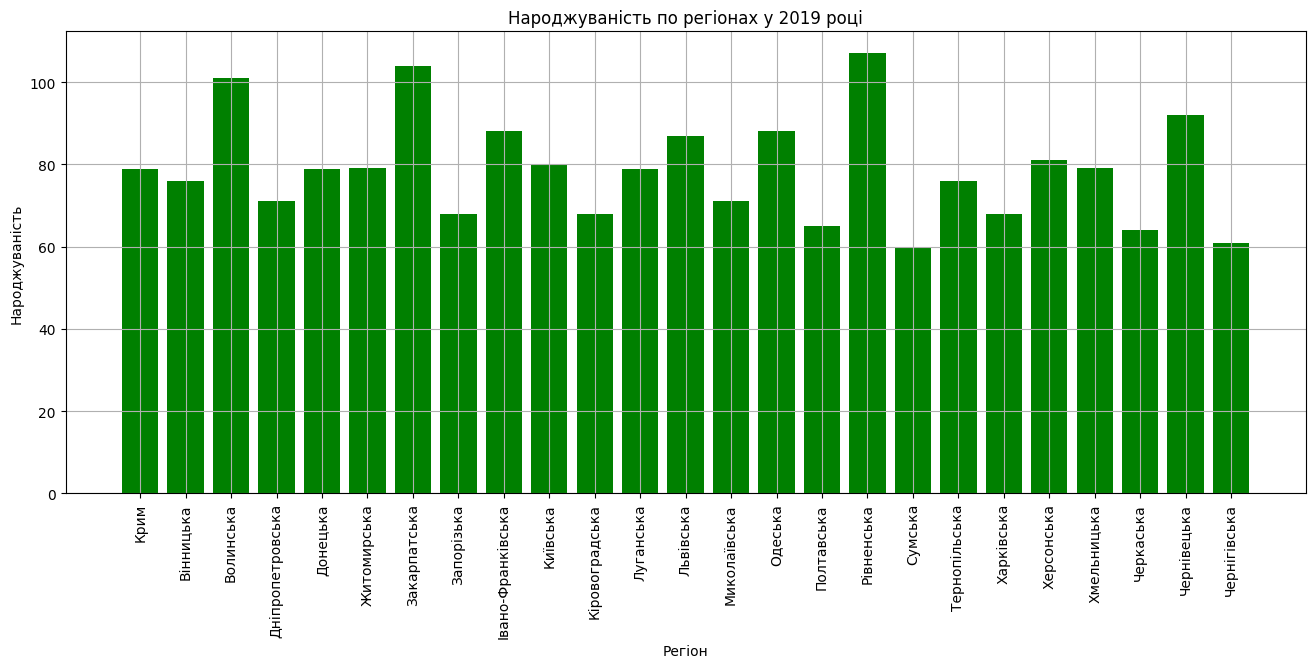

In [58]:
data_for_plot = modified_table_filled[["Регіон", "2019"]]

plt.figure(figsize=(16, 6))
plt.bar(data_for_plot["Регіон"], data_for_plot["2019"], color='green')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
